## Bring in libraries and dataframes and set indexes

In [1]:
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ETFunctions
%matplotlib inline
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
import statsmodels.api as sm
import matplotlib.dates as mdates

C:\Anaconda\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
ObsData = pd.read_pickle('.\DataFrames\SoilVWC.pkl')

## Export top layer data for evaporation analysis

In [3]:
TopLayer = ObsData.loc[:,['D1B','D1I']]
#TopLayer.columns = TopLayer.columns.droplevel(3)
TopLayer.loc[:,['D1B','D1I']].to_pickle('.\DataFrames\TopVWC.pkl')

In [4]:
TopLayer

Depth                   D1B                                                  \
Cultivar               Dash                                                   
Irrigation             High                             Low                   
Block                     1       2       3       4       1       2       3   
2014-11-05 08:00:00  0.2039  0.1720  0.1801  0.2000  0.1882  0.2316  0.2117   
2014-11-05 08:15:00  0.2039  0.1722  0.1800  0.2000  0.1884  0.2315  0.2119   
2014-11-05 08:30:00  0.2042  0.1722  0.1803  0.2001  0.1884  0.2315  0.2119   
2014-11-05 08:45:00  0.2042  0.1723  0.1803  0.2001  0.1884  0.2315  0.2118   
2014-11-05 09:00:00  0.2041  0.1726  0.1803  0.2001  0.1884  0.2318  0.2118   
...                     ...     ...     ...     ...     ...     ...     ...   
2015-02-11 22:45:00  0.1079  0.1119  0.0940  0.1064  0.0545  0.0729  0.0739   
2015-02-11 23:00:00  0.1079  0.1116  0.0940  0.1065  0.0545  0.0729  0.0742   
2015-02-11 23:15:00  0.1079  0.1116  0.0940  0.1065  0.0545  0.0729  0.0740   
2015-02-11 23:30:00  0.1079  0.1116  0.0940  0.1065  0.0543  0.0729  0.0740   
2015-02-11 23:45:00  0.1079  0.1116  0.0940  0.1065  0.0543  0.0729  0.0740   

Depth                                        ...     D1I                  \
Cultivar                                     ...   Omaka                   
Irrigation                      Mid          ...    High             Low   
Block                     4       1       2  ...       3       4       1   
2014-11-05 08:00:00  0.1756  0.2002  0.1855  ...  0.1990  0.1639  0.1773   
2014-11-05 08:15:00  0.1756  0.2002  0.1858  ...  0.1990  0.1640  0.1775   
2014-11-05 08:30:00  0.1756  0.2002  0.1858  ...  0.1989  0.1642  0.1775   
2014-11-05 08:45:00  0.1758  0.2002  0.1858  ...  0.1992  0.1641  0.1775   
2014-11-05 09:00:00  0.1758  0.2004  0.1861  ...  0.1992  0.1644  0.1778   
...                     ...     ...     ...  ...     ...     ...     ...   
2015-02-11 22:45:00  0.0480  0.0688  0.0653  ...  0.1845  0.0828  0.0502   
2015-02-11 23:00:00  0.0480  0.0688  0.0653  ...  0.1845  0.0829  0.0502   
2015-02-11 23:15:00  0.0480  0.0688  0.0651  ...  0.1845  0.0829  0.0502   
2015-02-11 23:30:00  0.0480  0.0686  0.0651  ...  0.1846  0.0829  0.0502   
2015-02-11 23:45:00  0.0478  0.0686  0.0651  ...  0.1845  0.0829  0.0499   

Depth                                                                        
Cultivar                                                                     
Irrigation                                      Mid                          
Block                     2       3       4       1       2       3       4  
2014-11-05 08:00:00  0.2145  0.2022  0.2079  0.1662  0.2153  0.1851  0.1810  
2014-11-05 08:15:00  0.2145  0.2025  0.2082  0.1661  0.2152  0.1854  0.1813  
2014-11-05 08:30:00  0.2148  0.2025  0.2081  0.1664  0.2152  0.1853  0.1813  
2014-11-05 08:45:00  0.2148  0.2025  0.2081  0.1664  0.2152  0.1856  0.1813  
2014-11-05 09:00:00  0.2147  0.2025  0.2081  0.1664  0.2153  0.1856  0.1815  
...                     ...     ...     ...     ...     ...     ...     ...  
2015-02-11 22:45:00  0.0456  0.0609  0.0484  0.0752  0.0652  0.0694  0.0644  
2015-02-11 23:00:00  0.0456  0.0607  0.0485  0.0752  0.0652  0.0692  0.0644  
2015-02-11 23:15:00  0.0456  0.0607  0.0484  0.0752  0.0652  0.0692  0.0644  
2015-02-11 23:30:00  0.0456  0.0607  0.0484  0.0752  0.0652  0.0692  0.0644  
2015-02-11 23:45:00  0.0454  0.0607  0.0484  0.0750  0.0652  0.0691  0.0644  

[9207 rows x 48 columns]

In [5]:
TopLayer.columns.droplevel(3)

MultiIndex([('D1B',  'Dash', 'High'),
            ('D1B',  'Dash', 'High'),
            ('D1B',  'Dash', 'High'),
            ('D1B',  'Dash', 'High'),
            ('D1B',  'Dash',  'Low'),
            ('D1B',  'Dash',  'Low'),
            ('D1B',  'Dash',  'Low'),
            ('D1B',  'Dash',  'Low'),
            ('D1B',  'Dash',  'Mid'),
            ('D1B',  'Dash',  'Mid'),
            ('D1B',  'Dash',  'Mid'),
            ('D1B',  'Dash',  'Mid'),
            ('D1B', 'Omaka', 'High'),
            ('D1B', 'Omaka', 'High'),
            ('D1B', 'Omaka', 'High'),
            ('D1B', 'Omaka', 'High'),
            ('D1B', 'Omaka',  'Low'),
            ('D1B', 'Omaka',  'Low'),
            ('D1B', 'Omaka',  'Low'),
            ('D1B', 'Omaka',  'Low'),
            ('D1B', 'Omaka',  'Mid'),
            ('D1B', 'Omaka',  'Mid'),
            ('D1B', 'Omaka',  'Mid'),
            ('D1B', 'Omaka',  'Mid'),
            ('D1I',  'Dash', 'High'),
            ('D1I',  'Dash', 'High'),
            

## Calculate soil water deficit

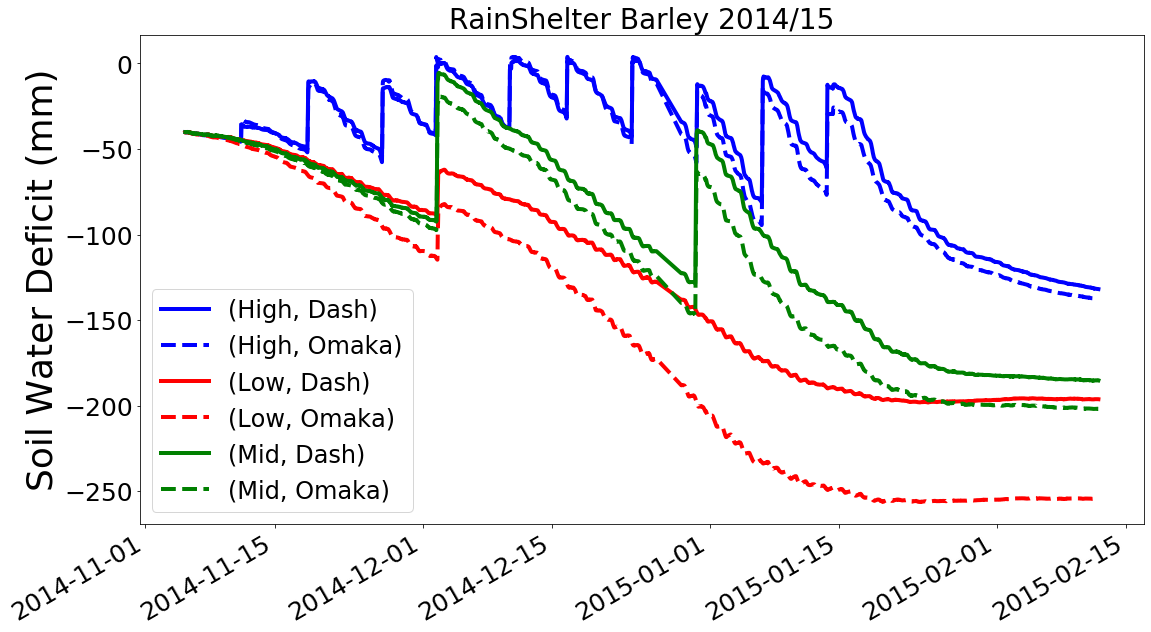

In [6]:
#Calculate treatment means omitting data prior to 2014-11-05 08:00:00 to avoid NaN values
DataMeans =  ObsData.loc['2014-11-05 08:00:00':'2015-02-11'].groupby(level=['Depth','Irrigation', 'Cultivar'],axis=1).mean()
DataMeans =  DataMeans.dropna(axis=1) #For some reason it keeps non valid combinations in so need to extract with this function

#Calculate the water content of the soil profile by multiplying the volumetric water content by each layers
#depth and summing.  The 0-15 layers are divided by 2 to average the two readings
ProfileWater = DataMeans.loc[:,'D1I'] * 150/2 + \
               DataMeans.loc[:,'D1B'] * 150/2 + \
               DataMeans.loc[:,'D2'] * 150 + \
               DataMeans.loc[:,'D3'] * 300 + \
               DataMeans.loc[:,'D4'] * 300 + \
               DataMeans.loc[:,'D5'] * 300 + \
               DataMeans.loc[:,'D6'] * 300 + \
               DataMeans.loc[:,'D7'] * 300
                
FieldCapacity = ProfileWater.resample('D').max()
FieldCapacity = FieldCapacity.loc['2014-11-05'] + 40  # I would have though this would return a data frame with a single row but instead it returns a series with a multiindex in columns
SoilWaterDeficit = -(FieldCapacity - ProfileWater)    # This calculation only works because field capacity is a multi index series
SoilWaterDeficit.plot(figsize=(18,10),style=['b-','b--','r-','r--','g-','g--'], linewidth=4)
plt.ylabel('Soil Water Deficit (mm)', fontsize=36);
plt.tick_params(labelsize=25)
plt.title('RainShelter Barley 2014/15', fontsize=28);
plt.legend(fontsize=24, loc=3)

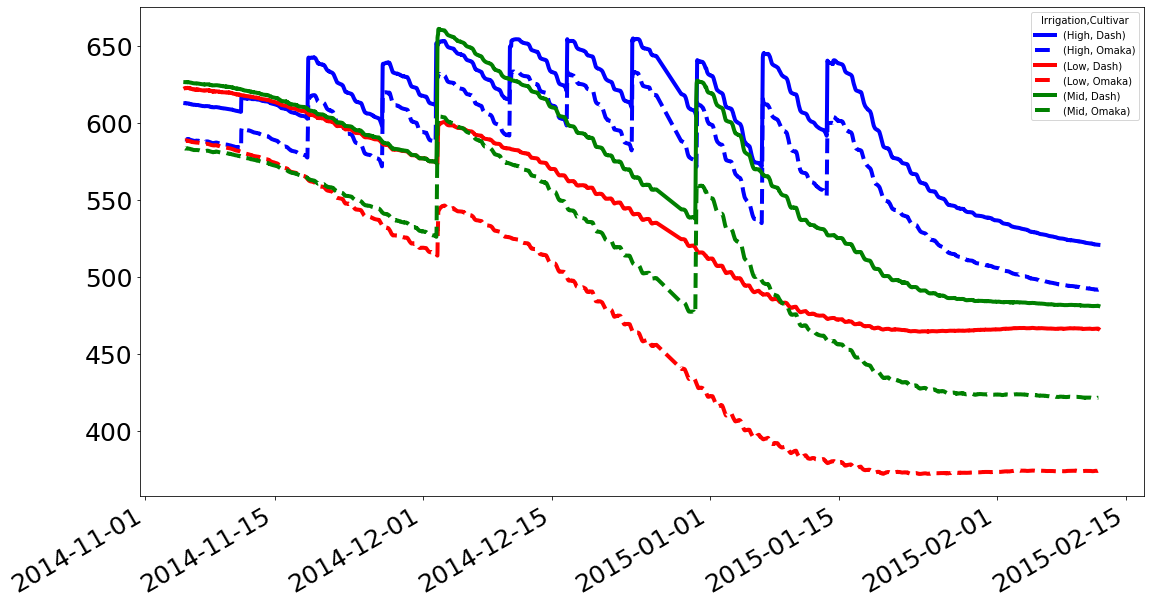

In [7]:
ProfileWater.plot(figsize=(18,10),style=['b-','b--','r-','r--','g-','g--'], linewidth=4)
plt.tick_params(labelsize=25)

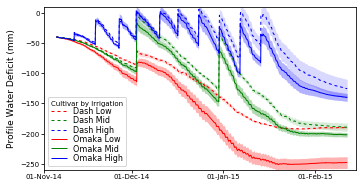

In [9]:
DataMeans2 = ObsData.loc['2014-11-05 08:00:00':'2015-02-11'].groupby(level=['Depth', 'Irrigation', 'Cultivar','Block'],axis=1).mean()
DataMeans2 =  DataMeans2.dropna(axis=1, how = 'all')

#Calculate the water content of the soil profile by multiplying the volumetric water content by each layers
#depth and summing.  The 0-15 layers are divided by 2 to average the two readings
ProfileWater2 = DataMeans2.loc[:,'D1I'] * 150/2 + \
               DataMeans2.loc[:,'D1B'] *150/2 + \
               DataMeans2.loc[:,'D2'] * 150 + \
               DataMeans2.loc[:,'D3'] * 300 + \
               DataMeans2.loc[:,'D4'] * 300 + \
               DataMeans2.loc[:,'D5'] * 300 + \
               DataMeans2.loc[:,'D6'] * 300 + \
               DataMeans2.loc[:,'D7'] * 300
                
FieldCapacity2 = ProfileWater2.resample('D').max()
FieldCapacity2 = FieldCapacity2.loc['2014-11-05'] + 40
SoilWaterDeficit2 = -(FieldCapacity2 - ProfileWater2)

#Start = '2011-07-01'
#Depths = ['D7', 'D23', u'D30', 'D50' , 'D70', 'D90','D110', 'D130', 'D150']
Cultivars = ['Dash','Omaka']
Irrigations = ['Low', 'Mid','High']
lines = ['--','-']
gaps = [3,0.000001]
colors = ['r','g','b']
alphas = [0.15,0.3]

Graph = plt.figure(figsize=(5.6,3))
fig = Graph.add_subplot(1,1,1)
CulPos = 0
for Cul in Cultivars:
    IrrPos = 0
    for Irr in Irrigations:
        Ind = SoilWaterDeficit2.loc[:,(Irr,Cul)].index
        Med = SoilWaterDeficit2.loc[:,(Irr,Cul)].median(axis=1)
        SEM = SoilWaterDeficit2.loc[:,(Irr,Cul)].std(axis=1)/np.sqrt(4)
        Upp = Med + SEM
        Low = Med - SEM
        plt.fill_between(Ind,Upp,Low,color = colors[IrrPos],alpha=alphas[CulPos],lw=0)
        plt.plot(Ind,Med,lines[CulPos],color=colors[IrrPos], linewidth = 1,dashes = (3,gaps[CulPos]),label = Cul + ' ' + Irr)
        IrrPos += 1
    CulPos+=1

    plt.ylabel('Profile Water Deficit (mm)', fontsize=9)
plt.tick_params(axis='x', which='both', bottom=True,top=False, labelbottom=True,labelsize=7,length = 3, direction = 'out', pad = 1)
plt.tick_params(axis='y', which='both', left=True,right=False, labelright=False,labelsize=7, length = 3, direction = 'out', pad = 1)
        
#     ledg = plt.legend(loc=3,numpoints=1,fontsize = 24,labelspacing = 0.05, 
#                       title='Treatment')
#     ledg.get_title().set_fontsize(28)
#     ledg.get_title().set_weight('bold')
plt.ylim(-260,10)
plt.xlim(datetime.date(2014,11,1),datetime.date(2015,2,15))
fig.xaxis.set_major_locator(mdates.MonthLocator())
fig.xaxis.set_major_formatter(mdates.DateFormatter('%d-%b-%y'))
ledg = plt.legend(loc=3,numpoints=1,fontsize = 8,labelspacing = 0.05, 
                          title='Cultivar by Irrigation')
ledg.get_title().set_fontsize(7)
#ledg.get_title().set_weight('bold')
plt.tight_layout
#plt.savefig('Fig_1.eps',dpi=1000)
plt.savefig('Fig_1.png',dpi=1000)
#plt.savefig('Fig_1.jpg',dpi=1000)

In [11]:
Start = ProfileWater2.index.min()
End = ProfileWater2.index.max()
ProfileWater2.loc[End,:] - ProfileWater2.loc[Start,:]

Irrigation  Cultivar  Block
High        Dash      1       -131.5875
                      2        -64.2150
                      3        -71.5800
                      4        -99.6000
            Omaka     1       -106.7325
                      2       -108.8775
                      3        -93.3600
                      4        -80.9925
Low         Dash      1       -150.0075
                      2       -144.1575
                      3             NaN
                      4       -152.8050
            Omaka     1       -198.1350
                      2       -242.7000
                      3       -208.1400
                      4       -207.3075
Mid         Dash      1       -151.3725
                      2       -124.9200
                      3       -156.6300
                      4       -147.1875
            Omaka     1       -152.4825
                      2       -161.1600
                      3       -170.6250
                      4       -162.1500
dtype: float

## Graph treatment means by layer

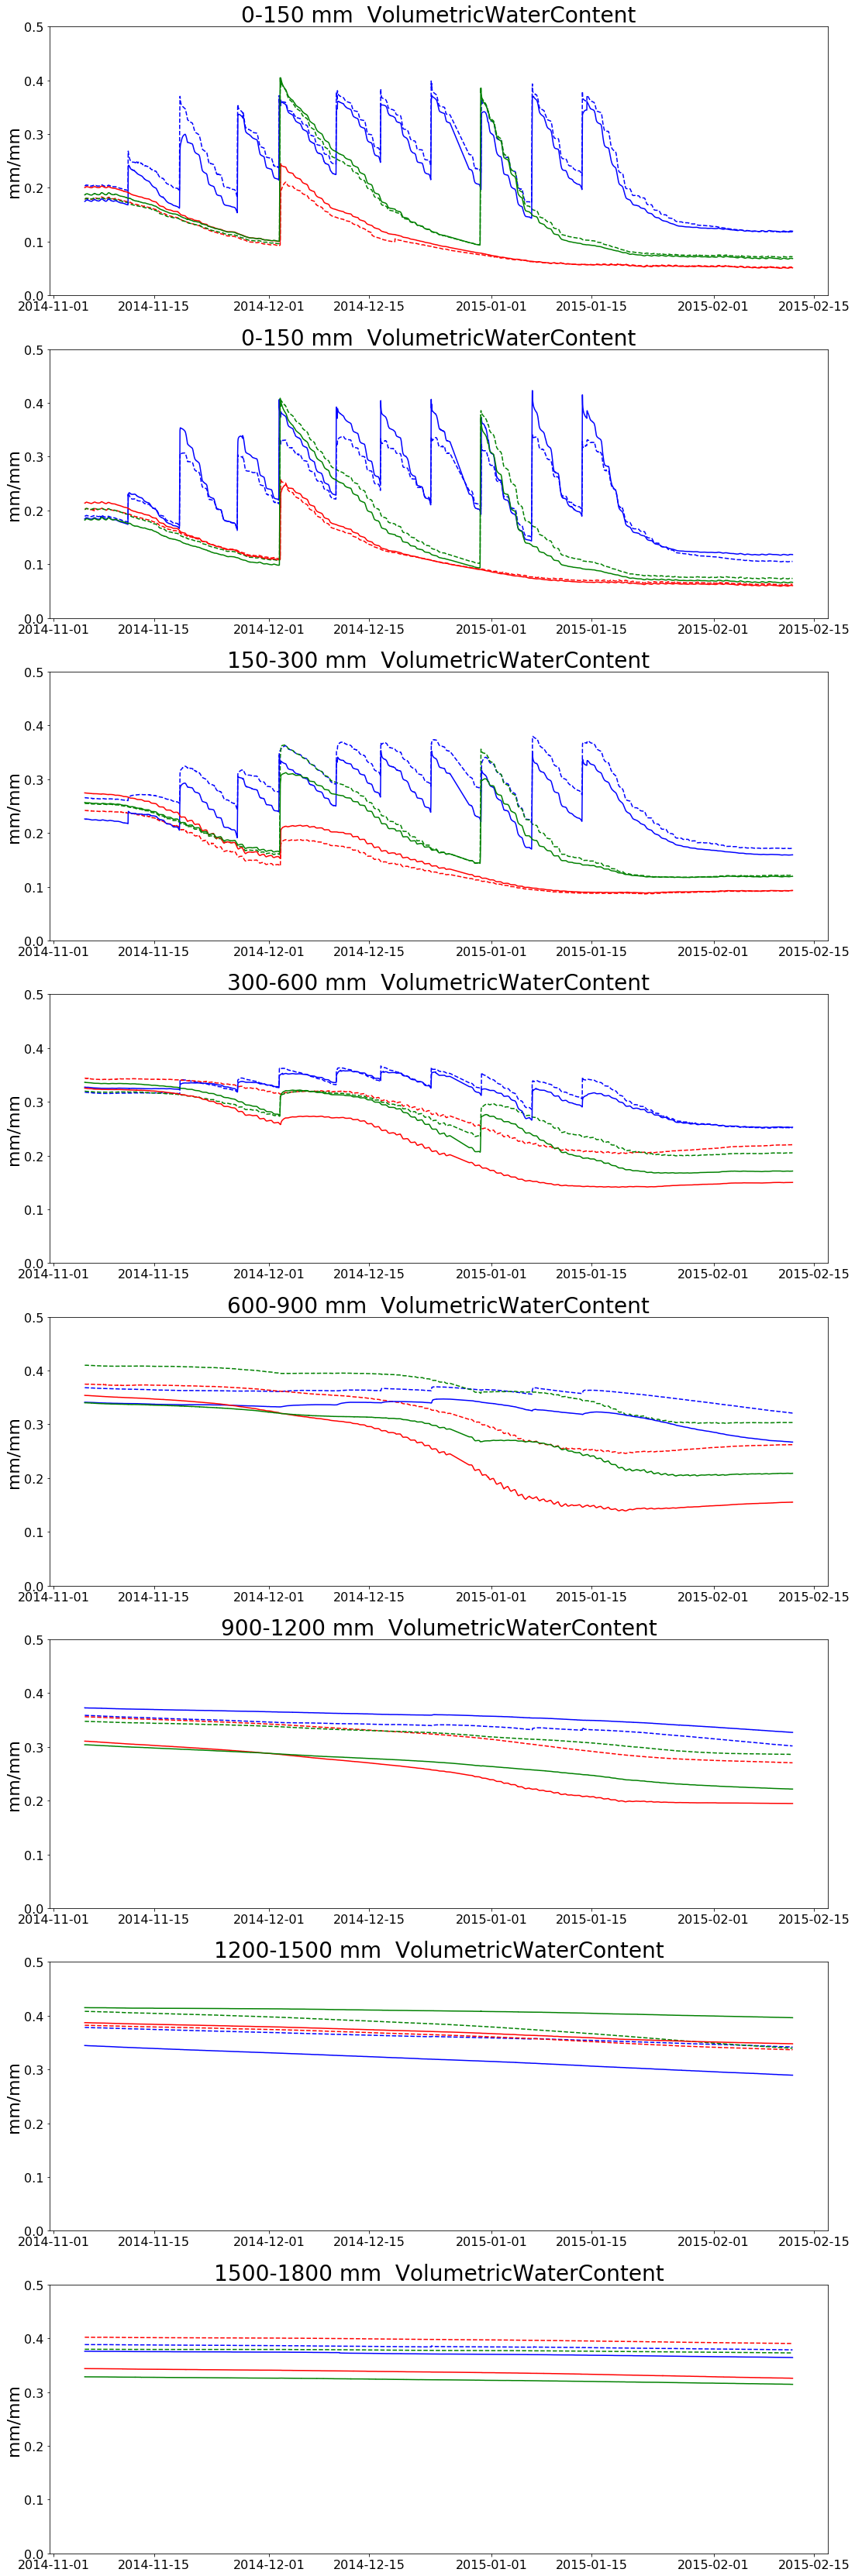

In [12]:
DataMeans3 = ObsData.loc['2014-11-05 08:00:00':'2015-02-11'].groupby(level=['Cultivar', 'Depth','Irrigation'],axis=1).mean()

Fig = plt.figure(figsize=(18, 60))

def MakePlot(Position, Depth, DepthLabel):
        ax = Fig.add_subplot(8,1,Position)
        ax.set_prop_cycle(color = ['b','r','g','b','r','g'])
        plt.title(DepthLabel + '  VolumetricWaterContent', fontsize=28);
        plt.plot(DataMeans.index,DataMeans3.Dash.loc[:,Depth], '--');
        plt.plot(DataMeans.index,DataMeans3.Omaka.loc[:,Depth], '-');
        plt.ylabel('mm/mm', fontsize=22);
        plt.tick_params(labelsize=16);
        plt.ylim(0,0.5);
        return;

MakePlot(1,'D1I','0-150 mm')
MakePlot(2,'D1B','0-150 mm')
MakePlot(3,'D2','150-300 mm')
MakePlot(4,'D3','300-600 mm')
MakePlot(5,'D4','600-900 mm')
MakePlot(6,'D5','900-1200 mm')
MakePlot(7,'D6','1200-1500 mm')
MakePlot(8,'D7','1500-1800 mm')

In [13]:
DeltaWater = ProfileWater2.diff()
DeltaWater.to_pickle('.\DataFrames\ProfileWaterDelta.pkl')
SWD = SoilWaterDeficit.resample('D').mean()
SWD.to_pickle('.\DataFrames\DailySWD.pkl')

In [14]:
DailyDeltaWater = DeltaWater.resample('d').sum().resample('d').sum()
DailyDeltaWater.columns = DailyDeltaWater.columns.swaplevel('Irrigation','Cultivar')
DailyDeltaWater.where(DailyDeltaWater<2,np.nan,inplace=True)
DailyDeltaWater.to_pickle('.\DataFrames\DailyWU.pkl')

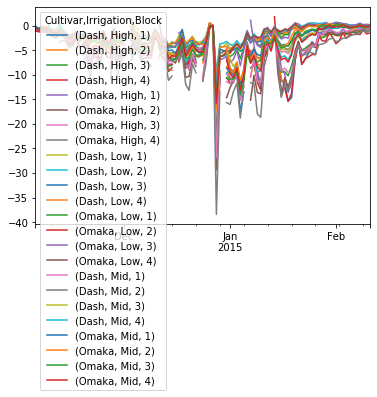

In [15]:
DailyDeltaWater.plot()

In [16]:
SWCLong = ObsData.unstack()

In [18]:
SWCLong.to_csv('SWC.dat',header=True)

In [19]:
DailyProfile = ProfileWater.loc[ProfileWater.index.hour==23,:].resample('D').mean()
DailyProfile.index.name='Date'
Cs = ['Dash','Omaka']
Is = ['High','Low','Mid']
SimNames = ['RS2014_15CultDashIrrHigh',
            'RS2014_15CultDashIrrLow',
            'RS2014_15CultDashIrrMed',
            'RS2014_15CultOmakaIrrHigh',
            'RS2014_15CultOmakaIrrLow',
            'RS2014_15CultOmakaIrrMed']
Dates = DailyProfile.dropna().loc[:,:].index
SimIndex = pd.MultiIndex.from_product([SimNames,Dates],names=['SimulationName','Clock.Today'])
LongProfile = DailyProfile.loc[:,:].stack().stack()
LongProfile = LongProfile.reorder_levels(['Cultivar','Irrigation','Date'])
LongProfile.sort_index(inplace=True)
LongProfile.index = SimIndex
ProfileWaterDF = pd.DataFrame(LongProfile,columns=['ProfileWater'])

In [20]:
DailyVWC = ObsData.loc[ObsData.index.hour==23,:].resample('D').mean().groupby(level=['Depth','Cultivar','Irrigation'],axis=1).mean()
Cs = ['Dash','Omaka']
Is = ['High','Mid','Low']
D1 = pd.DataFrame(columns = pd.MultiIndex.from_product([['D1'],Cs,Is],names=['Depth','Cultivar','Irrigation']),
            data = ((DailyVWC.D1B + DailyVWC.D1I)/2).values,
            index = DailyVWC.D1B.index)
DailyVWC = DailyVWC.join(D1)
DailyVWC = DailyVWC.loc[:,['D1','D2','D3','D4','D5','D6','D7']]
DailyVWC.index.name = 'Date'

In [21]:
LongData = DailyVWC.stack().stack()
LongData = LongData.reorder_levels(['Cultivar','Irrigation','Date'])
LongData.sort_index(inplace=True)
Cs = ['Dash','Omaka']
Is = ['High','Low','Mid']
SimNames = ['RS2014_15CultDashIrrHigh',
            'RS2014_15CultDashIrrLow',
            'RS2014_15CultDashIrrMed',
            'RS2014_15CultOmakaIrrHigh',
            'RS2014_15CultOmakaIrrLow',
            'RS2014_15CultOmakaIrrMed']
Dates = DailyVWC.dropna().index
SimIndex = pd.MultiIndex.from_product([SimNames,Dates],names=['SimulationName','Clock.Today'])
LongData.index = SimIndex
LongData.columns = ['Soil.SoilWater.SW(1)',
'Soil.SoilWater.SW(2)',
'Soil.SoilWater.SW(3)',
'Soil.SoilWater.SW(4)',
'Soil.SoilWater.SW(5)',
'Soil.SoilWater.SW(6)',
'Soil.SoilWater.SW(7)']

In [22]:
LongData.loc[:,'ProfileWater'] = ProfileWaterDF

In [23]:
LongData.to_excel('RS2014_15VWC_layers.xlsx',merge_cells=False)

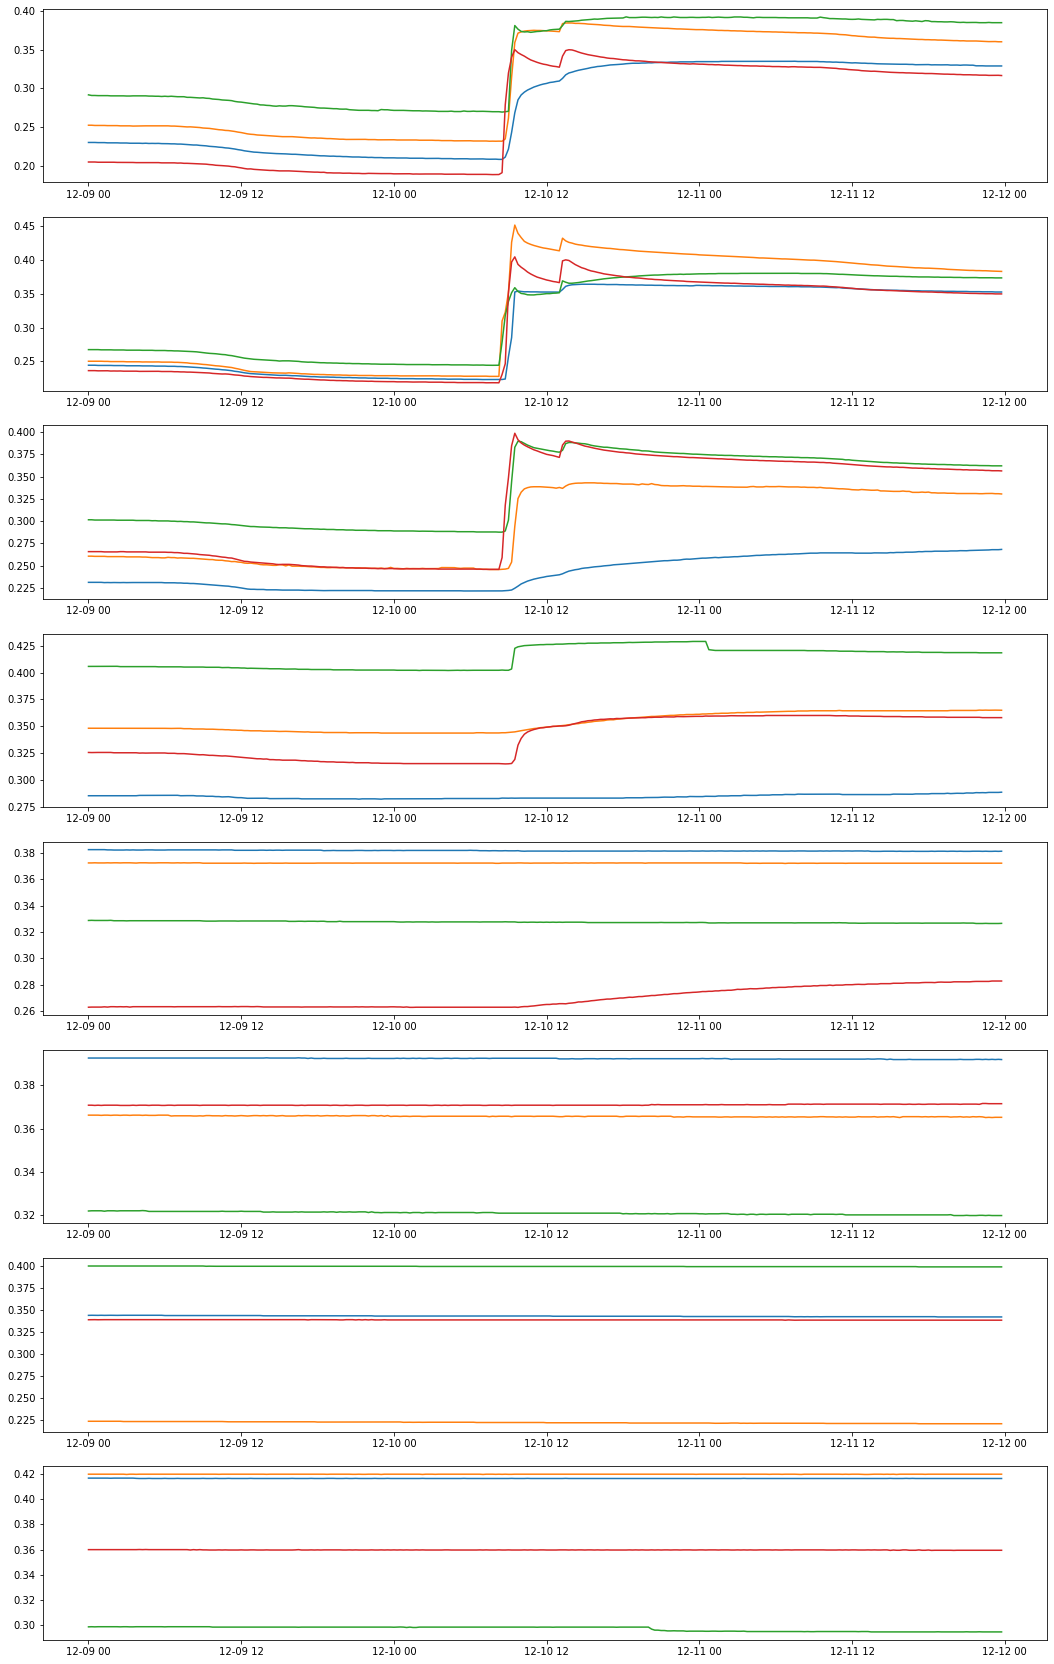

In [24]:
Graph = plt.figure(figsize=(18,30))
pos = 1
for D in ['D1I','D1B','D2','D3','D4','D5','D6','D7']:
    ax = Graph.add_subplot(8,1,pos)
    pos +=1
    plt.plot(ObsData.loc['2014-12-09':'2014-12-11',(D,'Omaka','High')])

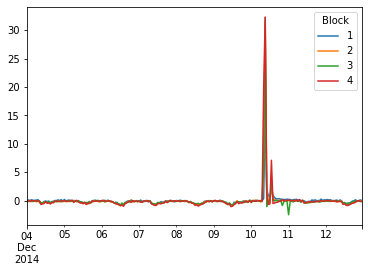

In [25]:
HourlyWaterUse = DeltaWater.resample('h').sum()
HourlyWaterUse.loc['2014-12-04':'2014-12-12',('High','Omaka')].plot()